In [176]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from scipy.stats import moyal

import ROOT

import sys
import math
from ROOT import TH1D,TF1, gRandom, gPad, gStyle, TCanvas
import matplotlib as mpl
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

# Define folder location and open ROOT file

In [177]:
srcFolder = "/data/Swirl_Mach2/20211004_1605/"
f = ROOT.TFile.Open(srcFolder+"DataInfo.root","READ")

# Define and Load TTree

In [178]:
f.ls()
tree = f.Get("Waveforms")
# hist = f.Get("hADCIntegral")

TFile**		/data/Swirl_Mach2/20211004_1605/DataInfo.root	
 TFile*		/data/Swirl_Mach2/20211004_1605/DataInfo.root	
  KEY: TTree	Waveforms;1	WaveformInfo


# Calculate integral with optimal window

In [179]:
integral = []
# nEntries = tree.GetEntries()
nEntries = 1000000 # Use only first 100000 entries, since it will take a long time to run if we use all entries
for i in range(0,nEntries):
    wf = []
    
    tree.GetEntry(i)
    if(tree.Channel!=4):
        continue
    for sample in tree.Waveform:
        wf.append(sample)
    bl = np.average(wf[0:40])
    pe_mev = 30
    pe_integral = (np.sum(np.array(wf[45:60])-bl))/pe_mev
    integral.append(pe_integral)

# Plot spectrum

Text(0.5, 1.0, 'Background spectrum')

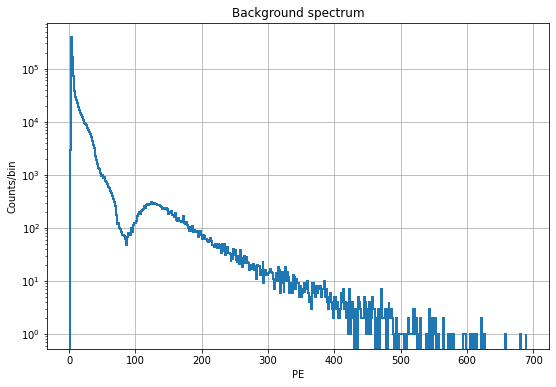

In [183]:
plt.figure(figsize=(9,6))

# sns.kdeplot(integral, );
# sns.distplot(integral, bins=200, );
plt.hist(np.array(integral), bins=500, histtype="step", lw=2, label="[56,66]");

plt.grid()
plt.yscale("log")
# plt.ylim(1E-4,)
plt.xlabel("PE")
plt.ylabel("Counts/bin")
plt.title("Background spectrum")
# plt.savefig("name.pdf")

# Muon/Gamma Separation Toy Monte Carlo Studies
## Generate Gamma Distributions
We currently don't have the simulated event-wise information, so this version of code creatse a "fake" background gamma spectrum composed of rough estimates of the K-40 and Tl-208 lines. (By T. Langford)

In [506]:
#peak = np.random.normal(loc=1.26, scale=0.1, size=70000)

#continuum = np.random.random(size=70000)
#continuum = np.multiply(continuum, 1.26)

#low_e = np.random.exponential(scale=0.2, size=1000000)

#k40 = np.concatenate((peak,continuum, low_e))

scale_factor= .2
peak = np.random.normal(loc=1.26, scale=0.1, size=int(100000*scale_factor))

continuum = np.random.random(size=int(1000000*scale_factor))
continuum = np.multiply(continuum, 1.26)

low_e = np.random.exponential(scale=0.2, size=int(100000))

k40 = np.concatenate((peak,continuum, low_e))

In [507]:
#peak = np.random.normal(loc=2.4, scale=0.1, size=7000)

#continuum = np.random.random(size=7000)
#continuum = np.multiply(continuum, 2.4)

#low_e = np.random.exponential(scale=0.3, size=100000)

#tl208 = np.concatenate((peak,continuum, low_e))

tl_scale_factor= scale_factor*.1

peak = np.random.normal(loc=2.4, scale=0.1, size=int(100000*tl_scale_factor))

continuum = np.random.random(size=int(1000000*tl_scale_factor))
continuum = np.multiply(continuum, 2.4)

low_e = np.random.exponential(scale=0.3, size=int(100000*scale_factor))

tl208 = np.concatenate((peak,continuum, low_e))

In [508]:
bg = np.concatenate((k40,tl208))

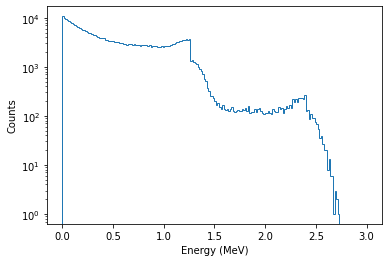

In [509]:
plt.hist(bg, bins=200, range=(0,3), histtype='step');
plt.xlabel('Energy (MeV)');
plt.ylabel('Counts');
plt.yscale("log")

# Muon distribution via Moyal
Use a moyal distribution with manually tuned loc and scale (T. Langford)

TODO: Adjust parameters to match the data (surface and underground)

In [510]:
mu = moyal.rvs(loc=4.5, scale=.7, size=15000)

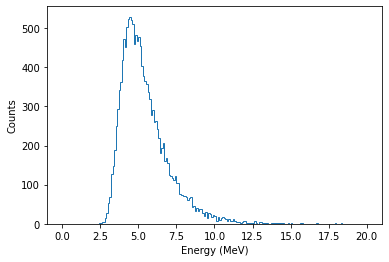

In [511]:
plt.hist(mu, bins=200, range=(0,20), histtype='step');
plt.xlabel('Energy (MeV)');
plt.ylabel('Counts');

# Apply PE/MeV resolution

In [519]:
# pe/MeV for a specfic prototype
pe_mev = 30

In [520]:
bg_pe = np.multiply(bg, pe_mev)
mu_pe = np.multiply(mu, pe_mev)

In [521]:
bg_smeared = np.random.normal(loc=bg_pe, scale=np.sqrt(bg_pe)*2)
mu_smeared = np.random.normal(loc=mu_pe, scale=np.sqrt(mu_pe)*1.1)

In [522]:
bg_det = np.divide(bg_smeared, pe_mev)
mu_det = np.divide(mu_smeared, pe_mev)

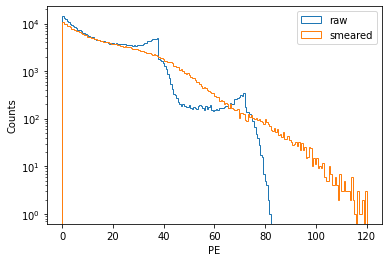

In [523]:
plt.hist(bg_pe, bins=200, range=(0,pe_mev*4), histtype='step', label='raw');
plt.hist(bg_smeared, bins=200, range=(0,pe_mev*4), histtype='step', label='smeared');
plt.legend()
plt.xlabel('PE');
plt.ylabel('Counts');
plt.yscale("log")

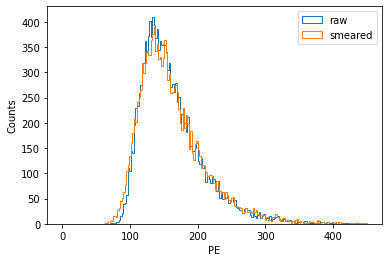

In [524]:
plt.hist(mu_pe, bins=200, range=(0,pe_mev*15), histtype='step', label='raw');
plt.hist(mu_smeared, bins=200, range=(0,pe_mev*15), histtype='step', label='smeared');
plt.legend()
plt.xlabel('PE');
plt.ylabel('Counts');

# Comparing Simulation to Measured Spectrum

## Gamma Spectrum and Simulation

Text(0.5, 1.0, 'Background spectrum')

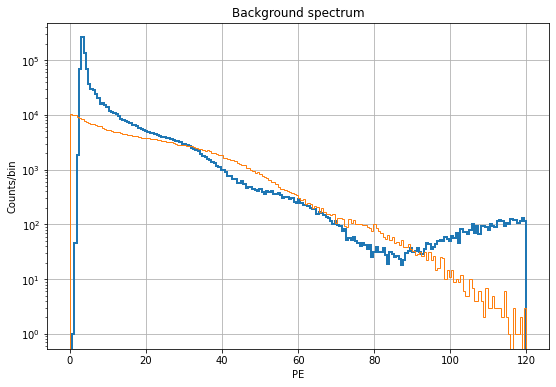

In [525]:
plt.figure(figsize=(9,6))

# sns.kdeplot(integral, );
# sns.distplot(integral, bins=200, );
plt.hist(np.array(integral), bins=200, range = (0,120),histtype="step", lw=2, label="[56,66]");
plt.hist(bg_smeared, bins=200, range=(0,120), histtype='step', label='Gamma')
#plt.hist(bg_smeared, bins=200, range=(0,pe_mev*15), histtype='step', label='Gamma')

plt.grid()
plt.yscale("log")
# plt.ylim(1E-4,)
plt.xlabel("PE")
plt.ylabel("Counts/bin")
plt.title("Background spectrum")
# plt.savefig("20210816_1521_LED5_diffWindows_noNorm.pdf")

# Muon Spectrum and Simulation

Text(0.5, 1.0, 'Background spectrum')

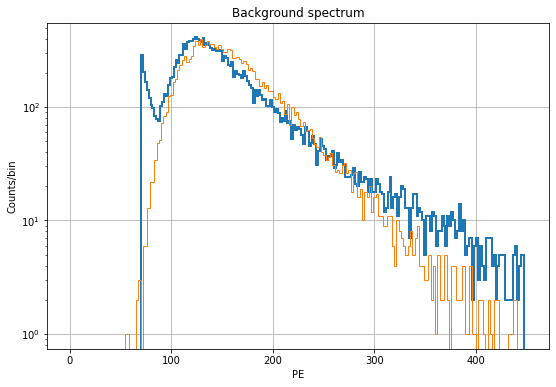

In [369]:
plt.figure(figsize=(9,6))

# sns.kdeplot(integral, );
# sns.distplot(integral, bins=200, );
plt.hist(np.array(integral), bins=200, range = (70,pe_mev*15),histtype="step", lw=2, label="[56,66]");
plt.hist(mu_smeared, bins=200, range=(0,pe_mev*15), histtype='step', label='smeared');

plt.grid()
plt.yscale("log")
# plt.ylim(1E-4,)
plt.xlabel("PE")
plt.ylabel("Counts/bin")
plt.title("Background spectrum")
# plt.savefig("20210816_1521_LED5_diffWindows_noNorm.pdf")

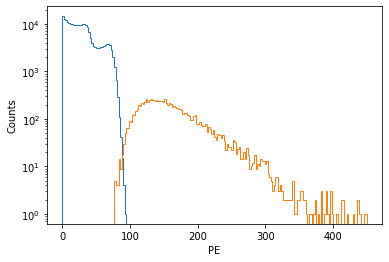

In [134]:
plt.hist(bg_smeared, bins=200, range=(0,pe_mev*15), histtype='step', label='Gamma')
plt.hist(mu_smeared, bins=200, range=(0,pe_mev*15), histtype='step', label='Muons')
plt.yscale('log')
plt.xlabel('PE');
plt.ylabel('Counts');

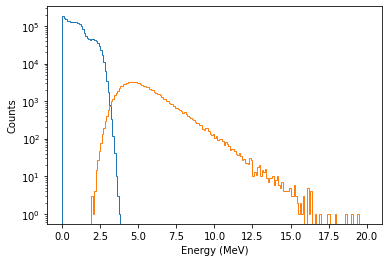

In [34]:
plt.hist(bg_det, bins=200, range=(0,20), histtype='step')
plt.hist(mu_det, bins=200, range=(0,20), histtype='step')
plt.yscale('log')
plt.xlabel('Energy (MeV)');
plt.ylabel('Counts');